In [1]:
!nvidia-smi

Wed Apr  3 18:21:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


In [4]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 23620, done.
remote: Counting objects: 100% (665/665), done.
remote: Compressing objects: 100% (468/468), done.
remote: Total 23620 (delta 396), reused 340 (delta 197), pack-reused 22955
Receiving objects: 100% (23620/23620), 14.22 MiB | 25.50 MiB/s, done.
Resolving deltas: 100% (16489/16489), done.


In [5]:
# # Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets





!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6kshFcsZENZYGREqxSaw")
project = rf.workspace("akshay-dilip-kumar-ois4s").project("cow_segmentation")
version = project.version(1)
dataset = version.download("yolov8")



/kaggle/working/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installat


Extracting Dataset Version Zip to cow_segmentation-1 in yolov8:: 100%|██████████| 5794/5794 [00:00<00:00, 6120.55it/s]


In [8]:
# %cd /kaggle/working/ultralytics
# !wget https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-seg.pt

## Custom Training

In [9]:
# !pip install -U ultralytics

In [10]:
# %cd {HOME}

# !yolo task=segment mode=train model=yolov8x-seg.pt data=/kaggle/input/12313131/data.yml epochs=10 imgsz=640

# !yolo task=segment mode=train model=yolov8x-seg.pt data=/kaggle/input/12313131/data.yml epochs=100 imgsz=640 device=0,1 
!yolo task=segment mode=train model=yolov8x-seg.pt data=/kaggle/input/12313131/data.yml epochs=30 imgsz=640 batch=32 device=0,1 cache=True


100%|█████████████████████████████████████████| 137M/137M [00:00<00:00, 329MB/s]
New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                       CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/kaggle/input/12313131/data.yml, epochs=30, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=(0, 1), workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, sa

In [11]:
HOME

'/kaggle/working'

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working/datasets


In [13]:
!ls /kaggle/working/ultralytics/runs/segment/train/

ls: cannot access '/kaggle/working/ultralytics/runs/segment/train/': No such file or directory


/kaggle/working/datasets


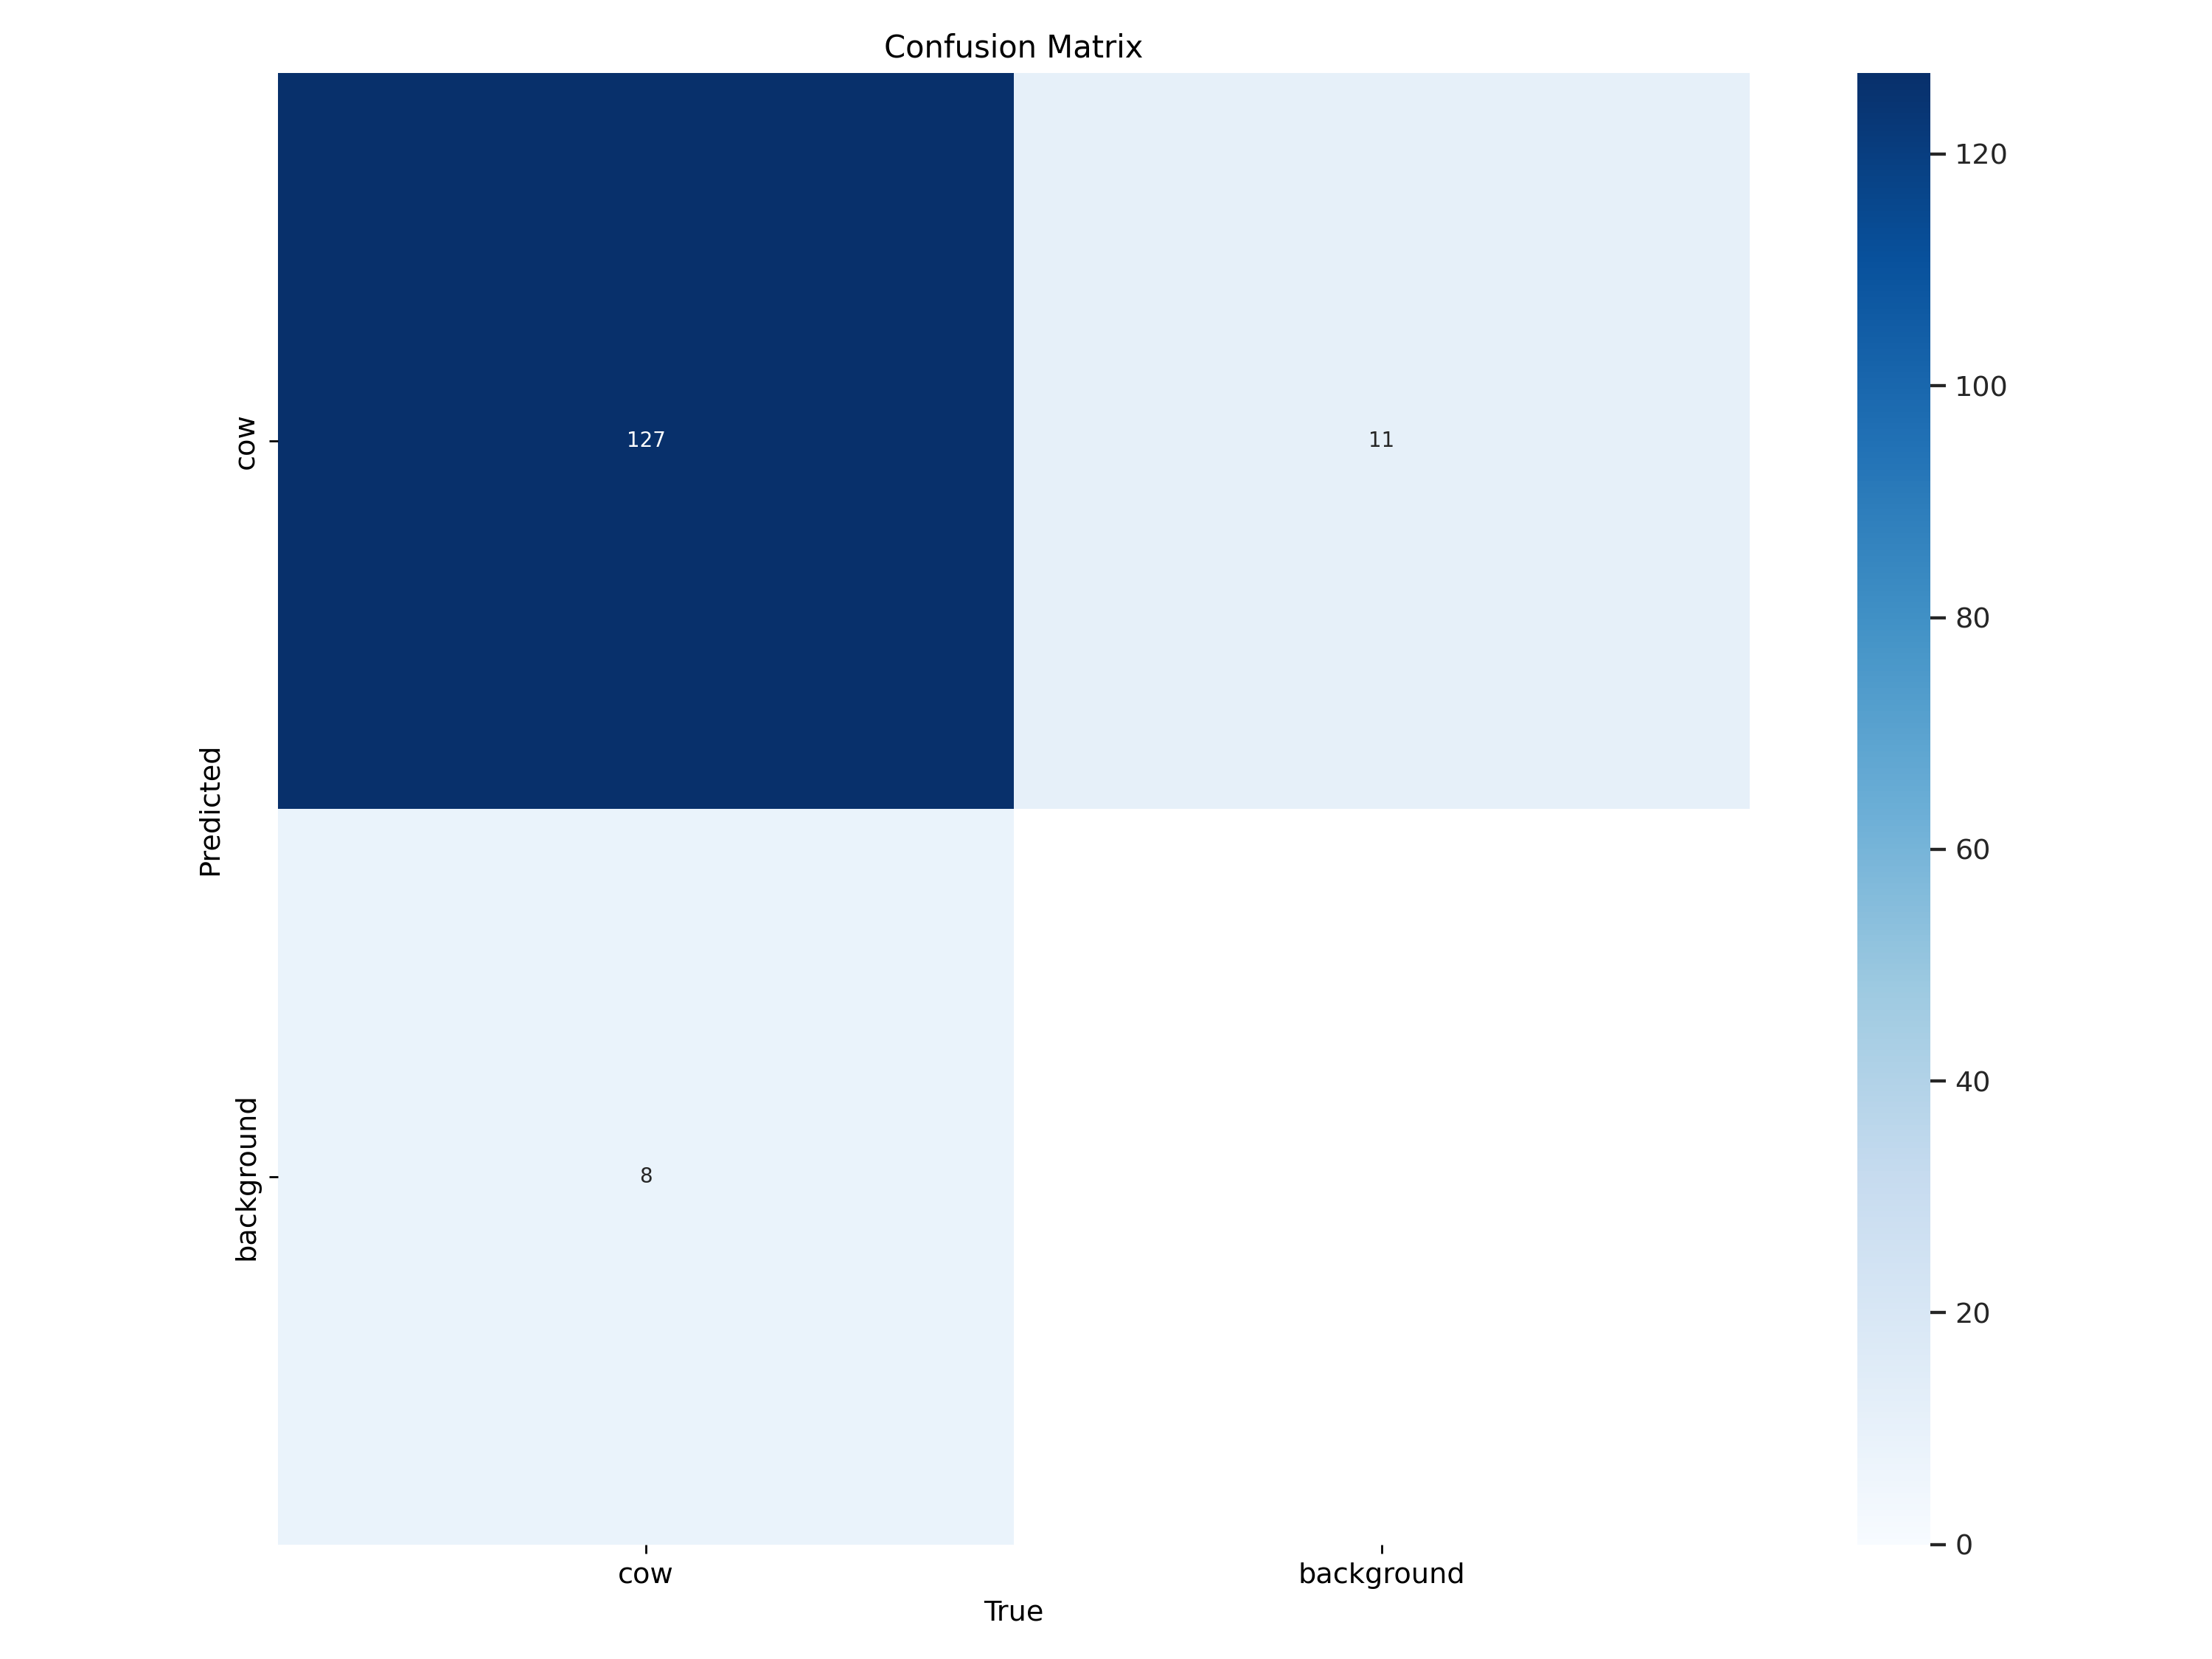

In [14]:
%cd {HOME}
Image(filename=f'/kaggle/working/datasets/runs/segment/train/confusion_matrix.png', width=600)

/kaggle/working/datasets


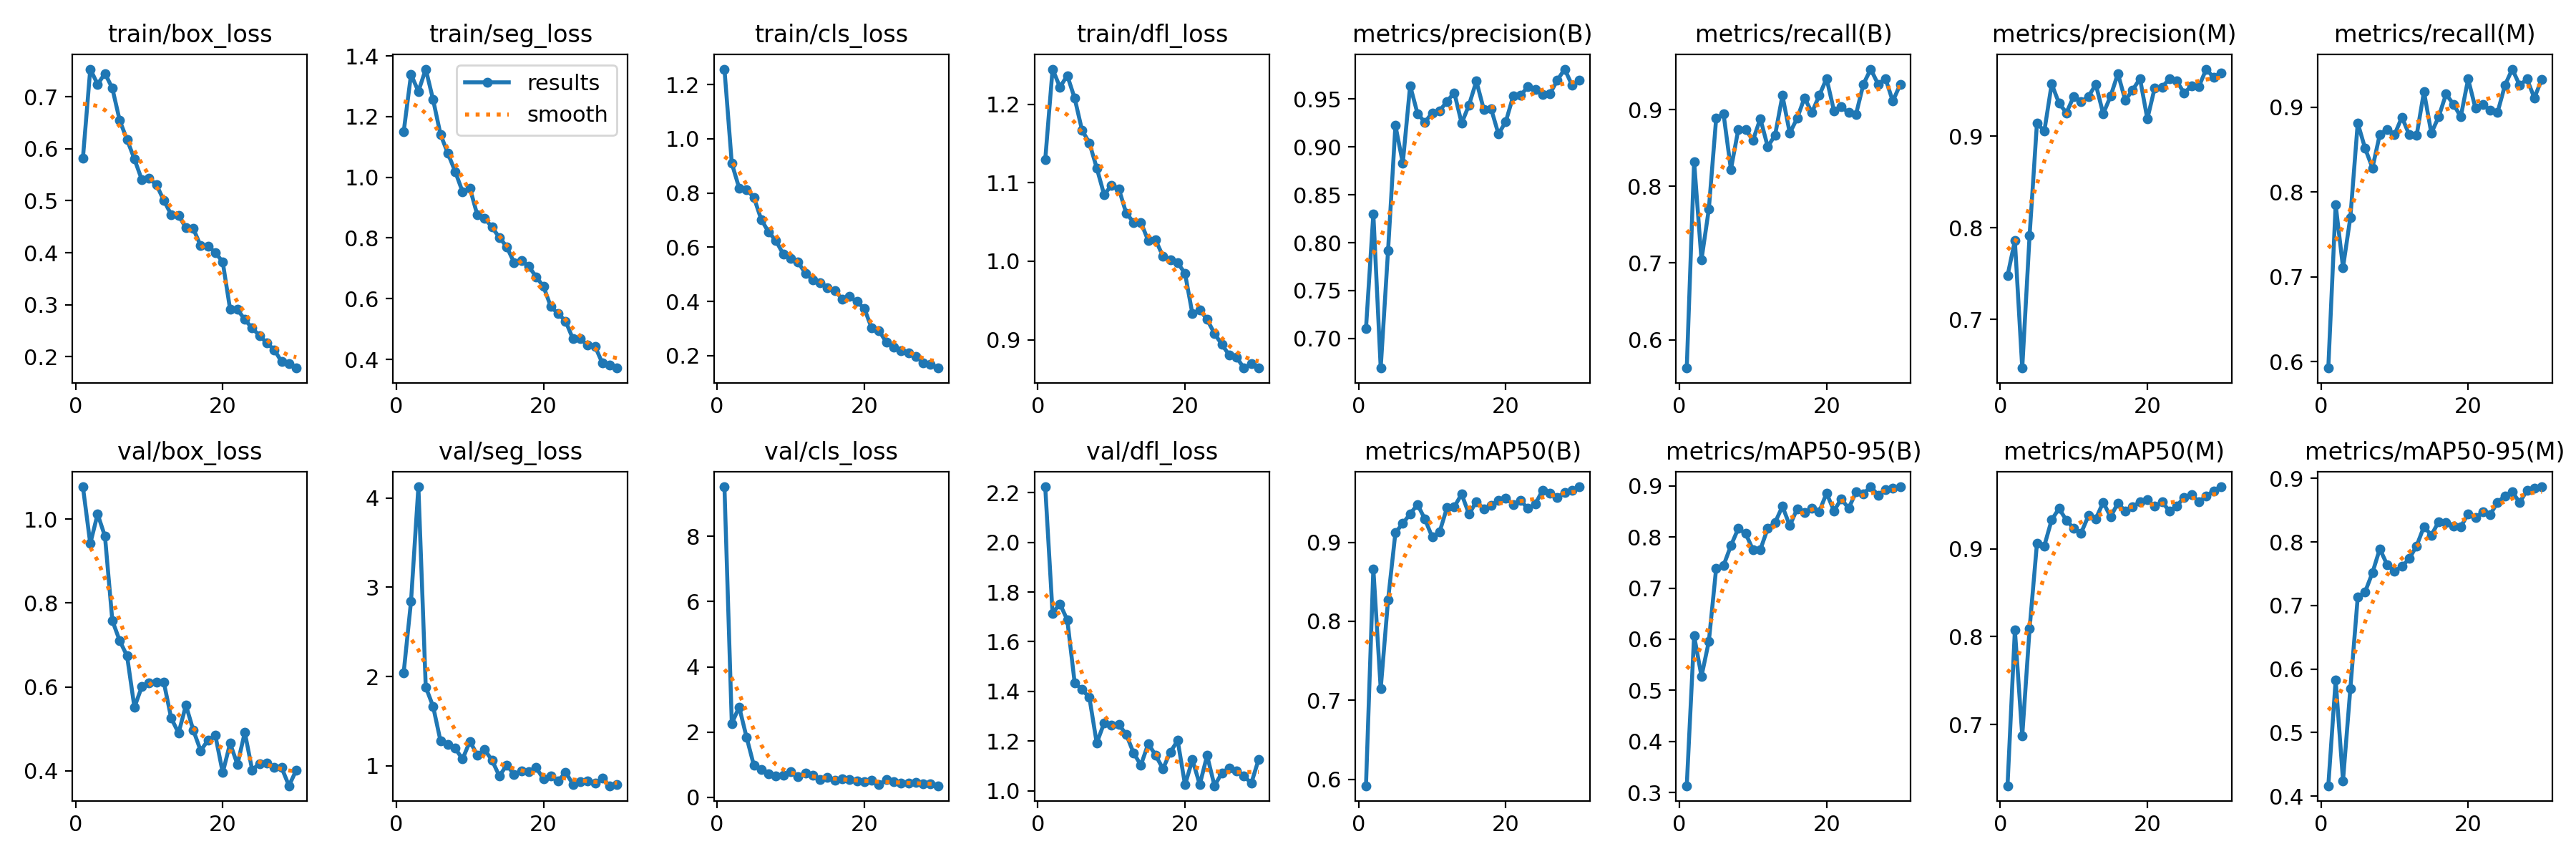

In [15]:
%cd {HOME}
Image(filename=f'/kaggle/working/datasets/runs/segment/train/results.png', width=600)

/kaggle/working/datasets


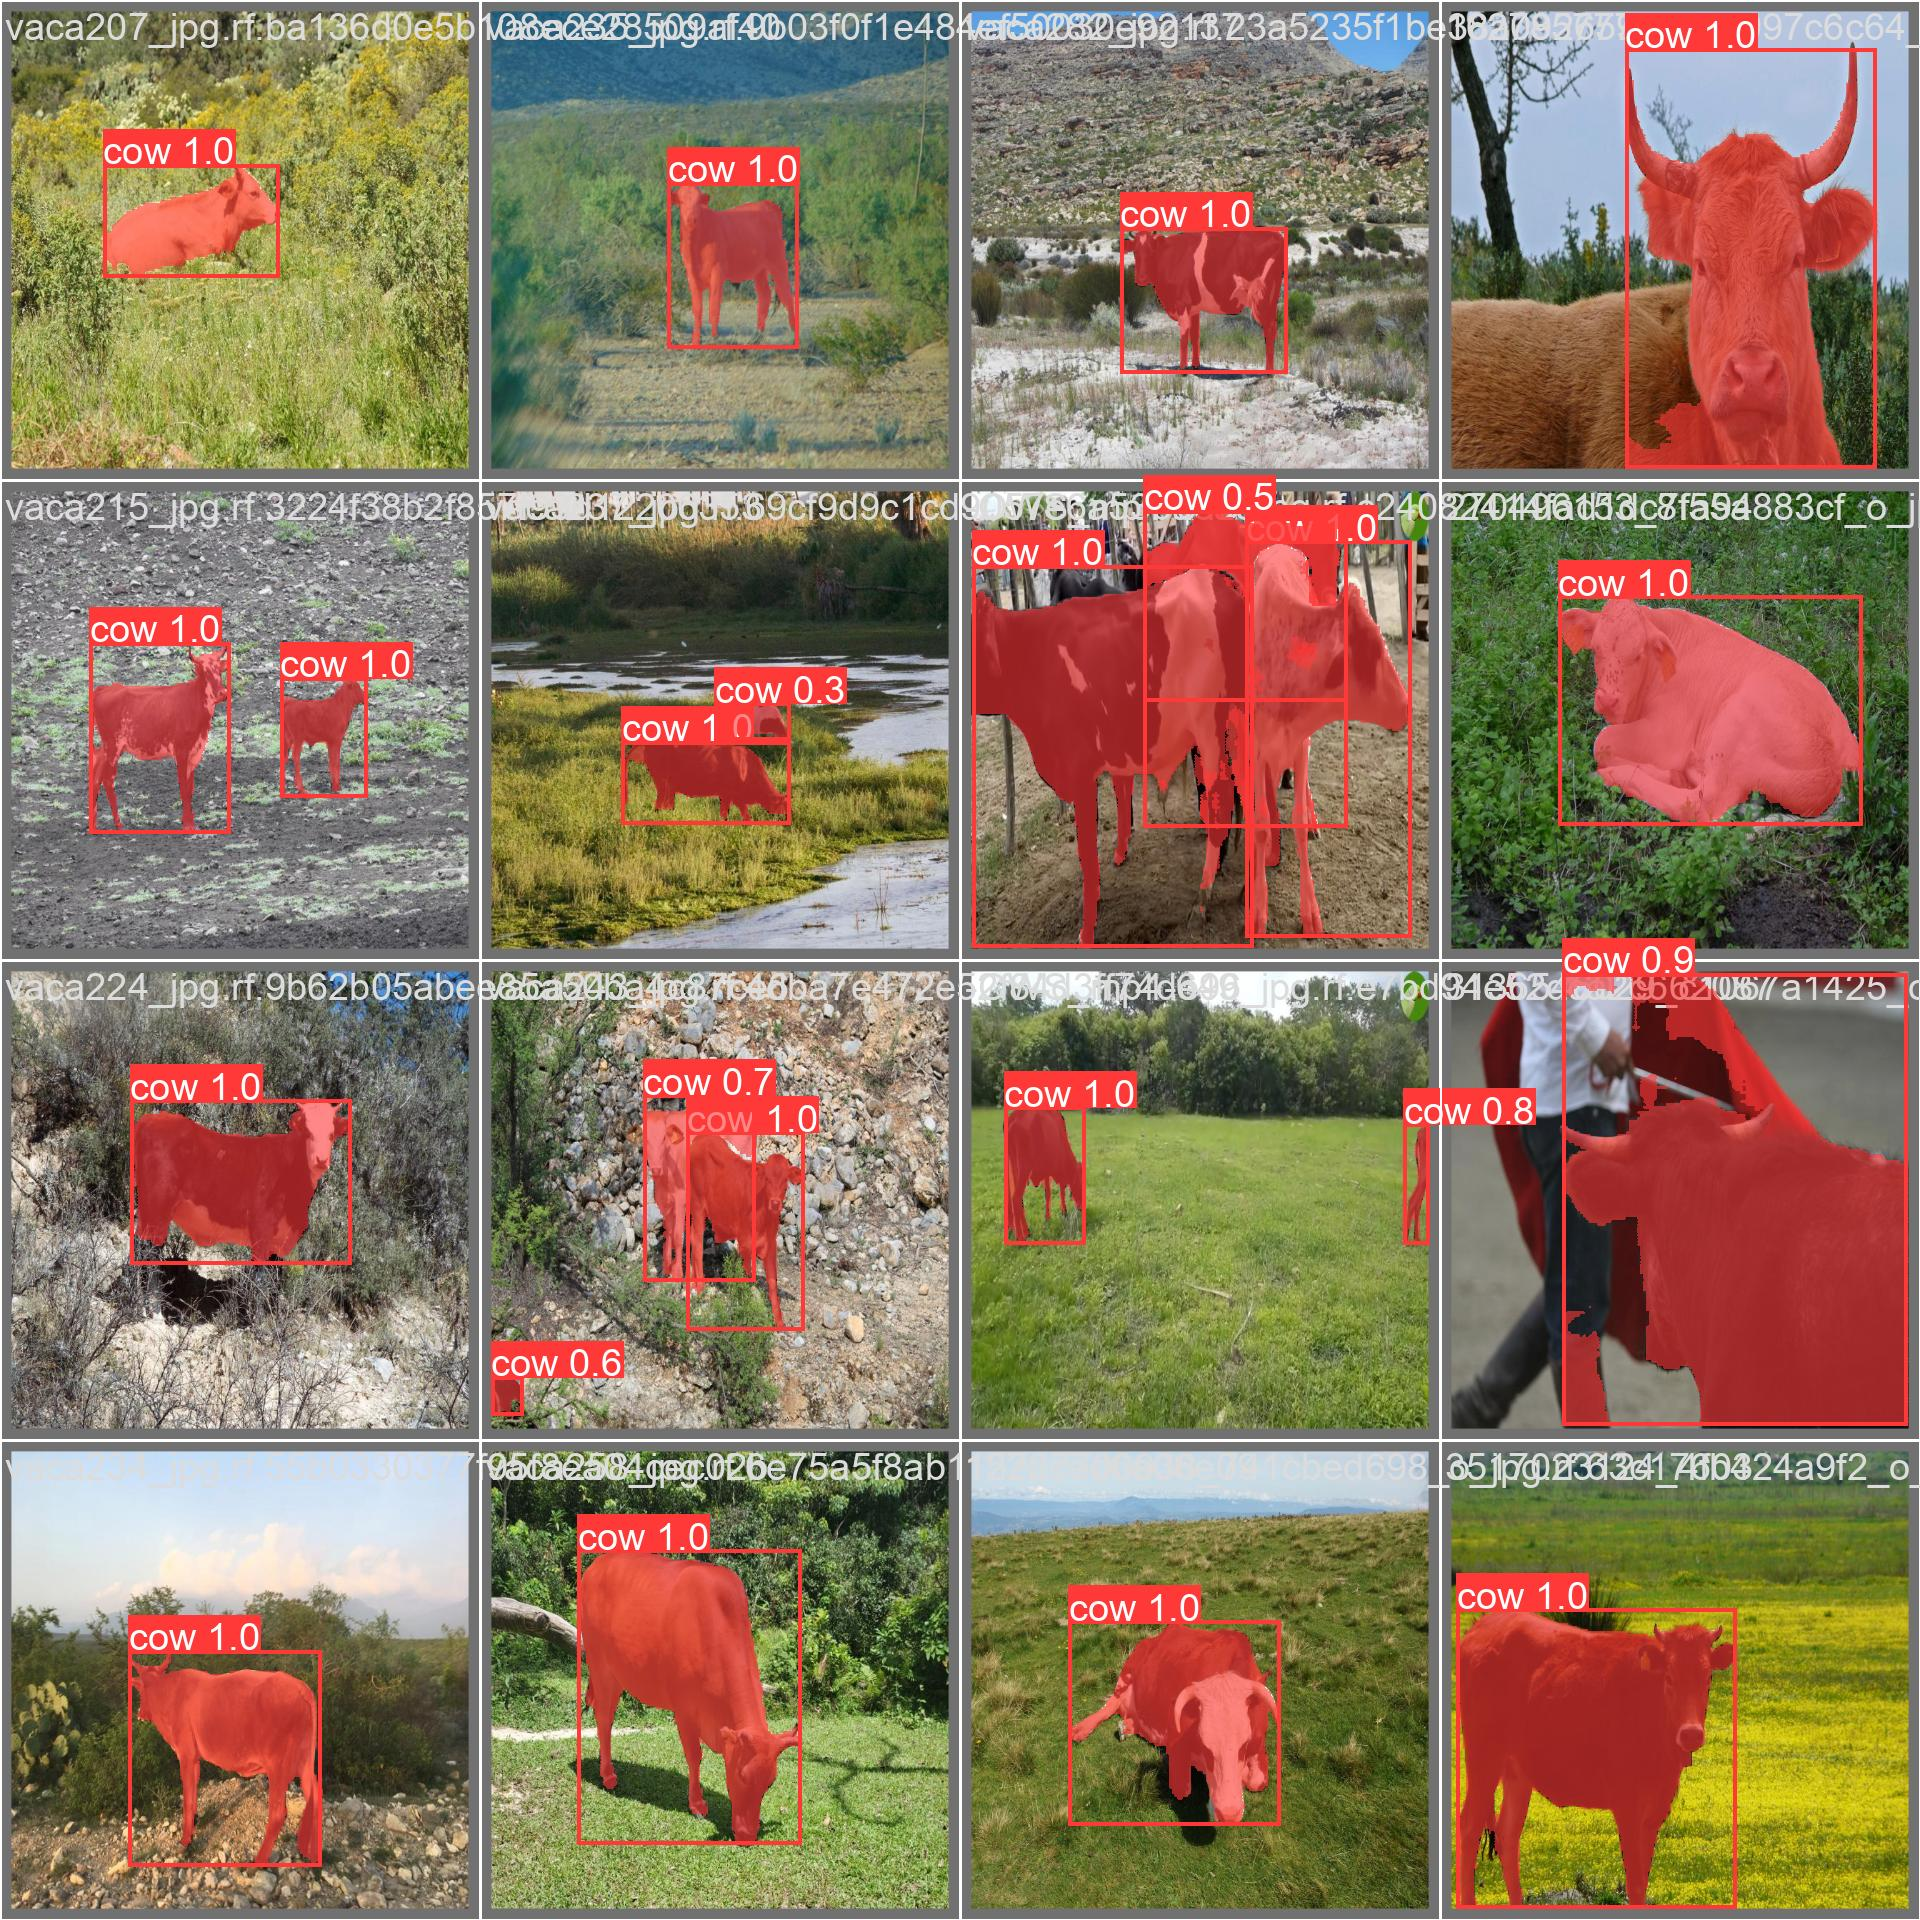

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [17]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /kaggle/working/datasets/cow_segmentation-1/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        111        135      0.969      0.933       0.97      0.898      0.969      0.933       0.97      0.886
Speed: 2.9ms preprocess, 73.0ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [18]:
%cd {HOME}
!yolo task=segment mode=predict model=/kaggle/working/datasets/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/kaggle/working/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

image 1/111 /kaggle/working/datasets/cow_segmentation-1/test/images/-OWS_mp4-123_jpg.rf.089d2655a2545dbb985b267984fbd54a.jpg: 640x640 7 cows, 86.1ms
image 2/111 /kaggle/working/datasets/cow_segmentation-1/test/images/-OWS_mp4-125_jpg.rf.c36a4c774869cfd5e8d59f7b4dd1fca9.jpg: 640x640 4 cows, 79.2ms
image 3/111 /kaggle/working/datasets/cow_segmentation-1/test/images/-OWS_mp4-140_jpg.rf.323d3d0715bbec2e2d75c99f62911403.jpg: 640x640 1 cow, 73.8ms
image 4/111 /kaggle/working/datasets/cow_segmentation-1/test/images/-OWS_mp4-180_jpg.rf.3bf2d5eec512055f34563efdfc1cd4fd.jpg: 640x640 2 cows, 72.4ms
image 5/111 /kaggle/working/datasets/cow_segmentation-1/test/images/-OWS_mp4-267_jpg.rf.7fc3d82b3878e19235bc7f14bba23312.jpg: 640x640 6 cows, 71.8ms
image 6/111 /kaggle/working/datasets/cow_segmentation-1/test